In [32]:
#Imported pandas and numpy for data analysis
#Imported matplotlib and seaborn for data visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
#Retrieved all data from https://ourworldindata.org; the exception is df0_Stock_idx, retrieved this data from https://www.kaggle.com. The stock market index data wasn't used in this project 
#Read all CSV files with pandas and assign them to their own named data frame
df0_Stock_idx = pd.read_csv('market_index_data_version1.csv')
df1_gov_spend = pd.read_csv('historical-gov-spending-gdp.csv')
df2_mil_spend = pd.read_csv('military-expenditure-share-gdp.csv')
df3_edu_spend = pd.read_csv('total-government-expenditure-on-education-gdp.csv')
df4_urbanization = pd.read_csv('urban-and-rural-population.csv')
df5_adopting_tech = pd.read_csv('ict-adoption-per-100-people.csv')
df6_gdp_per_capita = pd.read_csv('gdp-per-capita-world-bank-constant-usd.csv')
df7_tex_revnue = pd.read_csv('tax-revenues-as-a-share-of-gdp-unu-wider.csv')
df_8_population_growth = pd.read_csv('population-and-demography.csv')
df1_gov_spend


,Entity,Code,Year,Government Expenditure (IMF based on Mauro et al. (2015))
0,Afghanistan,AFG,2003,14.066129
1,Afghanistan,AFG,2004,15.657322
2,Afghanistan,AFG,2005,17.206297
3,Afghanistan,AFG,2006,21.535529
4,Afghanistan,AFG,2007,21.991904
...,...,...,...,...
7086,Zimbabwe,ZWE,2007,9.886323
7087,Zimbabwe,ZWE,2008,8.671767
7088,Zimbabwe,ZWE,2009,21.876465
7089,Zimbabwe,ZWE,2010,30.207680


In [34]:
#Clean Data to focus only on the United States...
desired_country = 'United States'  
df1_gov_spend = df1_gov_spend[df1_gov_spend['Entity'] == desired_country]
df2_mil_spend = df2_mil_spend[df2_mil_spend['Entity'] == desired_country]
df3_edu_spend = df3_edu_spend[df3_edu_spend['Entity'] == desired_country]
df4_urbanization = df4_urbanization[df4_urbanization['Entity'] == desired_country]
df5_adopting_tech = df5_adopting_tech[df5_adopting_tech['Entity'] == desired_country]
df6_gdp_per_capita = df6_gdp_per_capita[df6_gdp_per_capita['Entity'] == desired_country]
df7_tax_revnue = df7_tex_revnue[df7_tex_revnue['Entity'] == desired_country]
df_8_population_growth = df_8_population_growth[df_8_population_growth['Country name'] == desired_country]


In [35]:
#Check the time frame of each data set
df1_gov_spend
# 1880 - 2011
df2_mil_spend
#1949 - 2020
df3_edu_spend
#1960 - 2020
df4_urbanization
#1960 - 2021
df5_adopting_tech
#1960 - 2021
df6_gdp_per_capita
#1960 - 2021
df7_tax_revnue
#1902 - 2008


,Entity,Code,Year,Taxes including social contributions (as a share of GDP)
5834,United States,USA,1980,25.571890
5835,United States,USA,1981,25.972046
5836,United States,USA,1982,26.054338
5837,United States,USA,1983,24.012712
5838,United States,USA,1984,24.109865
5839,United States,USA,1985,24.658077
5840,United States,USA,1986,24.629921
5841,United States,USA,1987,25.690191
5842,United States,USA,1988,25.478336
5843,United States,USA,1989,25.662542


In [36]:
# Test merge the dataset on year.. Used two dataset with the exact same time range 1960 -2021. 
merged_df1_urbinization_and_tech_adoption = pd.merge(df4_urbanization, df5_adopting_tech, on=['Year', 'Entity', 'Code'], how='inner')
merged_df1_urbinization_and_tech_adoption

,Entity,Code,Year,Urban population,Rural population,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population)
0,United States,USA,1960,126462473,54208530.0,27.963787,NaN,0.000000,NaN
1,United States,USA,1961,129276215,54414784.0,26.386500,NaN,NaN,NaN
2,United States,USA,1962,131988693,54549308.0,26.386500,NaN,NaN,NaN
3,United States,USA,1963,134615404,54626596.0,26.386500,NaN,NaN,NaN
4,United States,USA,1964,137215986,54673016.0,26.386500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
57,United States,USA,2017,266788716,58333412.0,35.263824,32.808636,103.129790,87.27489
58,United States,USA,2018,268844029,57994170.0,33.218820,33.346176,104.847946,88.49890
59,United States,USA,2019,270737596,57592356.0,31.835100,34.186443,106.414020,89.43028
60,United States,USA,2020,274032053,57469028.0,30.302551,36.087180,104.935370,90.90000


In [37]:
# For simplification merged data frames containing 'Year', 'Entity' and 'Code' as common columns. 
#Only used data sets with reported data from atleast 1980-2020 to get a 40 year sample size. 
# Merged the last data frame left on df7_tax_revnue to force the timeframe of 1980 - 2020. 
merged_df = pd.merge(df6_gdp_per_capita, df2_mil_spend, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df4_urbanization, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df5_adopting_tech, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df3_edu_spend, on=['Year', 'Entity', 'Code'], how='left')
merged_df = pd.merge(merged_df, df_8_population_growth, on= 'Year', how='left')
merged_df = pd.merge(df7_tax_revnue, merged_df, on=['Year', 'Entity', 'Code'], how='left')

merged_df.T


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
Code,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Taxes including social contributions (as a share of GDP),25.57189,25.972046,26.054338,24.012712,24.109865,24.658077,24.629921,25.690191,25.478336,25.662542,...,24.376177,25.95164,26.349636,26.684587,26.364647,27.327879,25.457413,25.73765,26.16635,26.82138
GDP per capita (constant 2015 US$),31161.932,31640.678,30775.441,31893.2,33906.35,35008.53,35887.555,36798.605,37989.19,39014.203,...,54213.46,54830.785,55675.387,56762.73,57292.54,58207.58,59607.395,60698.01,58453.445,61855.52
military_expenditure_share_gdp,5.15,5.65,6.81,6.32,6.24,6.45,6.63,6.42,6.07,5.87,...,4.48,4.05,3.7,3.48,3.42,3.31,3.32,3.43,3.74,NaN
Urban population,167551171,169552427,171528659,173459636,175321738,177239105,179244877,181215212,183232441,185333919,...,254614421,256953576,259430732,261950744,264473000,266788716,268844029,270737596,274032053,275050303
Rural population,59673828.0,59913572.0,60135340.0,60332364.0,60503264.0,60684896.0,60888124.0,61073788.0,61266560.0,61485080.0,...,59263240.0,59106372.0,58955596.0,58788250.0,58598756.0,58333412.0,57994170.0,57592356.0,57469028.0,56843440.0
Fixed telephone subscriptions (per 100 people),42.252396,46.779236,47.157257,48.01107,48.353542,49.32498,49.803265,51.19351,52.45281,53.685394,...,43.768963,41.71677,39.90107,38.461185,37.084114,35.263824,33.21882,31.8351,30.302551,28.817118
Fixed broadband subscriptions (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.216364,30.068712,30.372572,31.487846,32.307674,32.808636,33.346176,34.186443,36.08718,37.69522


In [38]:
#Renamed data frame...
df_project = merged_df

In [39]:
#Renamed columns to simplify readability during graphing with matplotlib
new_column_names = {'Taxes including social contributions (as a share of GDP)': 'U.S. Tax Revnue (Share of GDP)', 'military_expenditure_share_gdp': 'Military Spending (Share of GDP)', 'GDP per capita (constant 2015 US$)': 'GDP Per Capita (Adjusted)', 'Historical and more recent expenditure estimates': 'Education Spending (Share of GDP)' }
df_project.rename(columns=new_column_names, inplace=True)
df_project.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Entity,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
Code,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
U.S. Tax Revnue (Share of GDP),25.57189,25.972046,26.054338,24.012712,24.109865,24.658077,24.629921,25.690191,25.478336,25.662542,...,24.376177,25.95164,26.349636,26.684587,26.364647,27.327879,25.457413,25.73765,26.16635,26.82138
GDP Per Capita (Adjusted),31161.932,31640.678,30775.441,31893.2,33906.35,35008.53,35887.555,36798.605,37989.19,39014.203,...,54213.46,54830.785,55675.387,56762.73,57292.54,58207.58,59607.395,60698.01,58453.445,61855.52
Military Spending (Share of GDP),5.15,5.65,6.81,6.32,6.24,6.45,6.63,6.42,6.07,5.87,...,4.48,4.05,3.7,3.48,3.42,3.31,3.32,3.43,3.74,NaN
Urban population,167551171,169552427,171528659,173459636,175321738,177239105,179244877,181215212,183232441,185333919,...,254614421,256953576,259430732,261950744,264473000,266788716,268844029,270737596,274032053,275050303
Rural population,59673828.0,59913572.0,60135340.0,60332364.0,60503264.0,60684896.0,60888124.0,61073788.0,61266560.0,61485080.0,...,59263240.0,59106372.0,58955596.0,58788250.0,58598756.0,58333412.0,57994170.0,57592356.0,57469028.0,56843440.0
Fixed telephone subscriptions (per 100 people),42.252396,46.779236,47.157257,48.01107,48.353542,49.32498,49.803265,51.19351,52.45281,53.685394,...,43.768963,41.71677,39.90107,38.461185,37.084114,35.263824,33.21882,31.8351,30.302551,28.817118
Fixed broadband subscriptions (per 100 people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.216364,30.068712,30.372572,31.487846,32.307674,32.808636,33.346176,34.186443,36.08718,37.69522


In [40]:
#Conduct some initial probing of data for exploration. 
columns_of_interest = ['Year', 'Population', 'GDP Per Capita (Adjusted)']
df_Population_GDP_Growth = df_project[columns_of_interest]
df_Population_GDP_Growth.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Year,1.980000e+03,1.981000e+03,1.982000e+03,1983.0,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,...,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03
Population,2.231400e+08,2.256540e+08,2.280014e+08,230389970.0,2.327663e+08,2.351462e+08,2.375128e+08,2.398532e+08,2.422878e+08,2.449541e+08,...,3.166513e+08,3.193752e+08,3.220340e+08,3.246078e+08,3.272102e+08,3.297912e+08,3.321400e+08,3.343197e+08,3.359420e+08,3.369976e+08
GDP Per Capita (Adjusted),3.116193e+04,3.164068e+04,3.077544e+04,31893.2,3.390635e+04,3.500853e+04,3.588756e+04,3.679861e+04,3.798919e+04,3.901420e+04,...,5.421346e+04,5.483079e+04,5.567539e+04,5.676273e+04,5.729254e+04,5.820758e+04,5.960739e+04,6.069801e+04,5.845344e+04,6.185552e+04


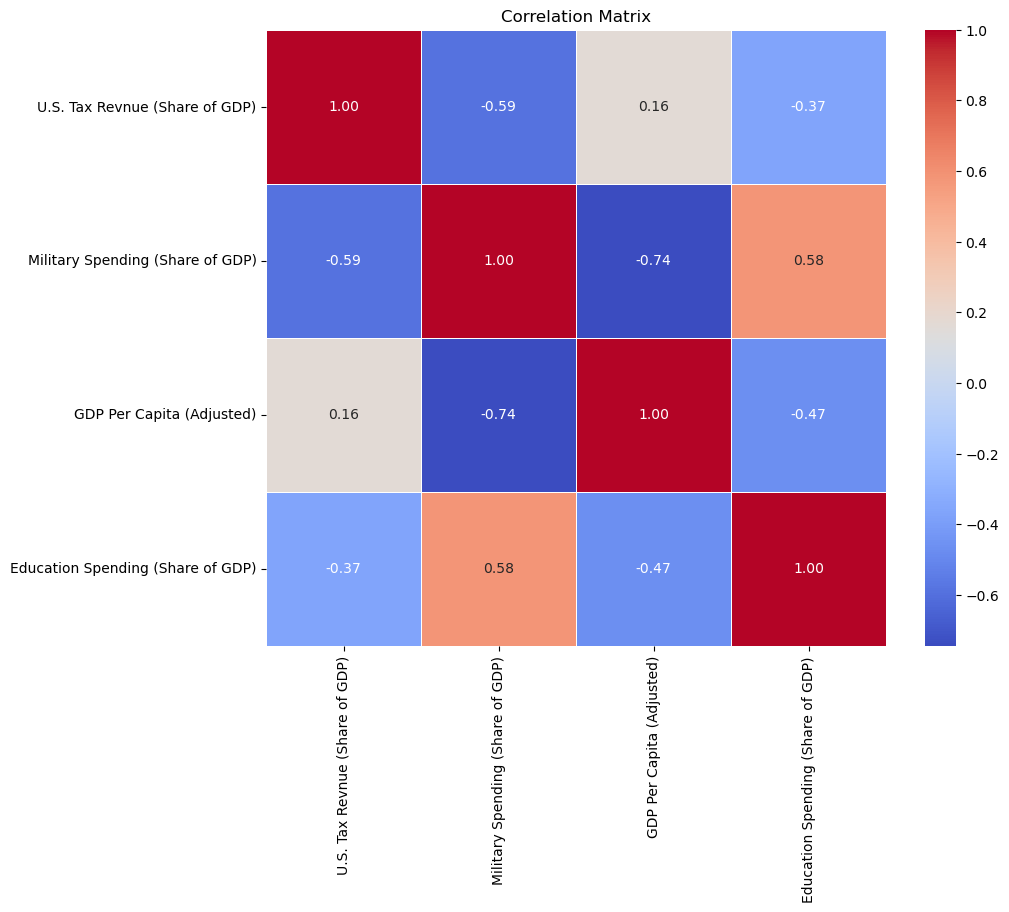

In [41]:
#Removed columns that were either repetitive qualitative data or not need for data analysis... 
columns_to_remove = ['Entity', 'Code', 'Country name' ]
df_project_2 = df_project.drop(columns=columns_to_remove)
#Called only column of data needed for inital data analysis. 
#Stored them in a new data frame.
#Used data frame to analyze data for correlations. Launched heat map for visualization. 
columns_of_interest = ['U.S. Tax Revnue (Share of GDP)', 'Military Spending (Share of GDP)', 'GDP Per Capita (Adjusted)', 'Education Spending (Share of GDP)']
correlation_matrix = df_project_2[columns_of_interest]
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [42]:
#Set main data frame for EDA project.
columns_of_interest2 = ['U.S. Tax Revnue (Share of GDP)', 'Military Spending (Share of GDP)', 'GDP Per Capita (Adjusted)', 'Education Spending (Share of GDP)', 'Year']
df_eda = df_project_2[columns_of_interest2]
df_eda

,U.S. Tax Revnue (Share of GDP),Military Spending (Share of GDP),GDP Per Capita (Adjusted),Education Spending (Share of GDP),Year
0,25.571890,5.15,31161.932,NaN,1980
1,25.972046,5.65,31640.678,NaN,1981
2,26.054338,6.81,30775.441,NaN,1982
3,24.012712,6.32,31893.200,NaN,1983
4,24.109865,6.24,33906.350,NaN,1984
5,24.658077,6.45,35008.530,NaN,1985
6,24.629921,6.63,35887.555,NaN,1986
7,25.690191,6.42,36798.605,NaN,1987
8,25.478336,6.07,37989.190,NaN,1988
9,25.662542,5.87,39014.203,NaN,1989


In [43]:
#Wanted to ensure years were in chronilogical order
#Changed GDP Per Capita to GDP Growth rate as percentage to prepare data for graphing
#This allows all the columns to be graphed by Years on the X-axis and Percentages on the Y-axis

# Sort the data by year to ensure it's in chronological order
df_eda.sort_values(by='Year', inplace=True)

# Calculated GDP growth rate
df_eda['GDP Growth Rate'] = (df_eda['GDP Per Capita (Adjusted)'].diff() / df_eda['GDP Per Capita (Adjusted)'].shift(1)) * 100

# Rounded the GDP growth rate to a specific number of decimal places
df_eda['GDP Growth Rate'] = df_eda['GDP Growth Rate'].round(2)

#Drop Year 2021 at Index 41
#Removed 2021 as an extreme outlier due to the COVID19 panemic. 
df_eda.drop(41, inplace=True)

#Visualized the DataFrame with GDP growth rate
df_eda
#Realized the data for education spending up to 2000 was incomplete. 
#Wasn't required for analysis, used education spending as a comparative variable to military spending for critical thinking reasons

/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_53995/1905719649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda.sort_values(by='Year', inplace=True)
/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_53995/1905719649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['GDP Growth Rate'] = (df_eda['GDP Per Capita (Adjusted)'].diff() / df_eda['GDP Per Capita (Adjusted)'].shift(1)) * 100
/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_53995/1905719649.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

,U.S. Tax Revnue (Share of GDP),Military Spending (Share of GDP),GDP Per Capita (Adjusted),Education Spending (Share of GDP),Year,GDP Growth Rate
0,25.571890,5.15,31161.932,NaN,1980,NaN
1,25.972046,5.65,31640.678,NaN,1981,1.54
2,26.054338,6.81,30775.441,NaN,1982,-2.73
3,24.012712,6.32,31893.200,NaN,1983,3.63
4,24.109865,6.24,33906.350,NaN,1984,6.31
5,24.658077,6.45,35008.530,NaN,1985,3.25
6,24.629921,6.63,35887.555,NaN,1986,2.51
7,25.690191,6.42,36798.605,NaN,1987,2.54
8,25.478336,6.07,37989.190,NaN,1988,3.24
9,25.662542,5.87,39014.203,NaN,1989,2.70


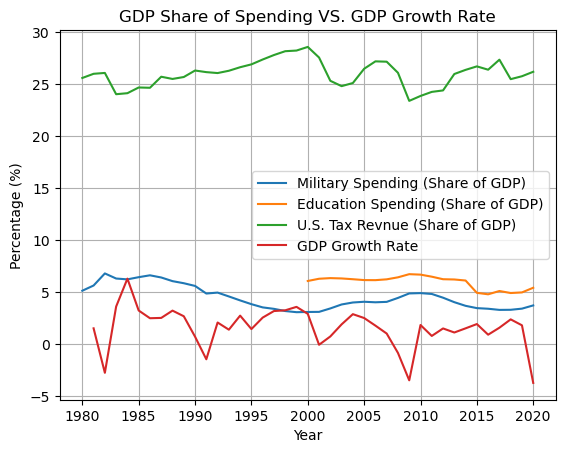

In [44]:
# Plotted data to visualize 
df_eda.plot(x='Year', y=['Military Spending (Share of GDP)', 'Education Spending (Share of GDP)', 'U.S. Tax Revnue (Share of GDP)', 'GDP Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('GDP Share of Spending VS. GDP Growth Rate')
plt.grid(True)
plt.show()

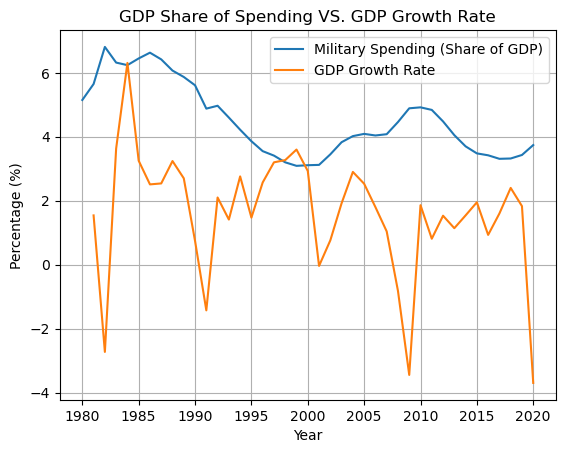

In [45]:
# Plotted to visualize military spending and GDP growth rate to analyze for trends or correlations. 

df_eda.plot(x='Year', y=['Military Spending (Share of GDP)', 'GDP Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('GDP Share of Spending VS. GDP Growth Rate')
plt.grid(True)
plt.show()

<Axes: xlabel='Year'>

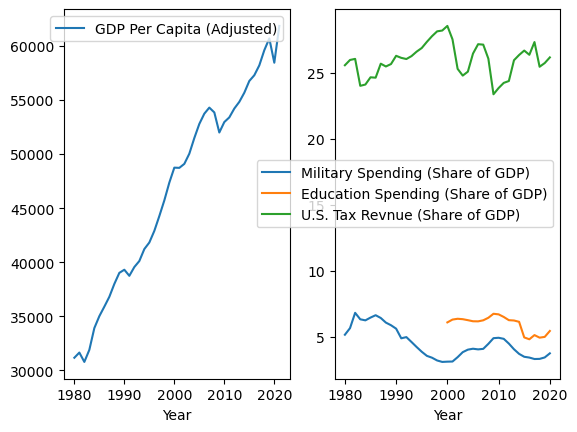

In [46]:
#Experimented with graphing the data side by on different subplots
fig, ax = plt.subplots(1, 2)
df_project_2.plot(x='Year', y=['GDP Per Capita (Adjusted)'], ax= ax[0])
df_eda.plot(x='Year', y=['Military Spending (Share of GDP)', 'Education Spending (Share of GDP)', 'U.S. Tax Revnue (Share of GDP)'], ax= ax[1])

In [47]:
#Re-examined quantitative data for any outliers, trends or potential correlations. 
df_eda

,U.S. Tax Revnue (Share of GDP),Military Spending (Share of GDP),GDP Per Capita (Adjusted),Education Spending (Share of GDP),Year,GDP Growth Rate
0,25.571890,5.15,31161.932,NaN,1980,NaN
1,25.972046,5.65,31640.678,NaN,1981,1.54
2,26.054338,6.81,30775.441,NaN,1982,-2.73
3,24.012712,6.32,31893.200,NaN,1983,3.63
4,24.109865,6.24,33906.350,NaN,1984,6.31
5,24.658077,6.45,35008.530,NaN,1985,3.25
6,24.629921,6.63,35887.555,NaN,1986,2.51
7,25.690191,6.42,36798.605,NaN,1987,2.54
8,25.478336,6.07,37989.190,NaN,1988,3.24
9,25.662542,5.87,39014.203,NaN,1989,2.70


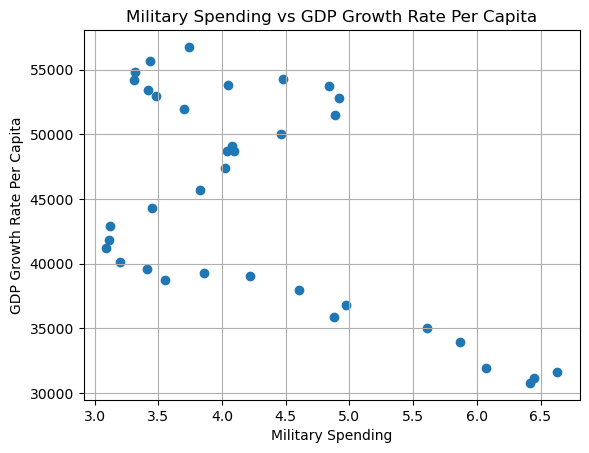

In [48]:
#Noticed some potential patterns and used logical reasoning to estimate there might be a lag effect.
#Plotted to visualize
lag = 5
plt.scatter(df_eda['Military Spending (Share of GDP)'], df_eda['GDP Per Capita (Adjusted)'].shift(lag))
plt.xlabel('Military Spending')
plt.ylabel('GDP Growth Rate Per Capita')
plt.title('Military Spending vs GDP Growth Rate Per Capita')
plt.grid(True)
plt.show()

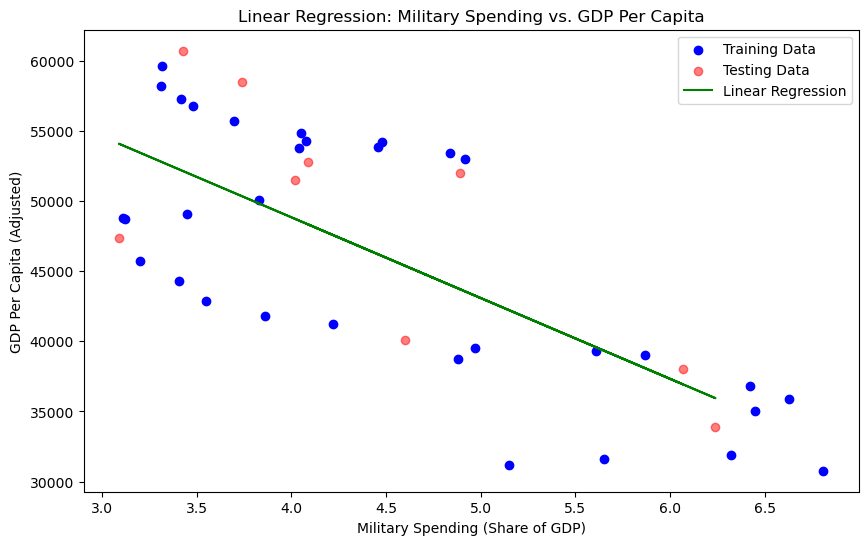

In [49]:
#Desired to set-up a linear regression model for future exprimentation or analysis. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df_eda['Military Spending (Share of GDP)']  # Independent variable
y = df_eda['GDP Per Capita (Adjusted)']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data', alpha=0.5)
plt.plot(X_test, model.predict(X_test), color='green', label='Linear Regression')
plt.xlabel('Military Spending (Share of GDP)')
plt.ylabel('GDP Per Capita (Adjusted)')
plt.title('Linear Regression: Military Spending vs. GDP Per Capita')
plt.legend()
plt.show()


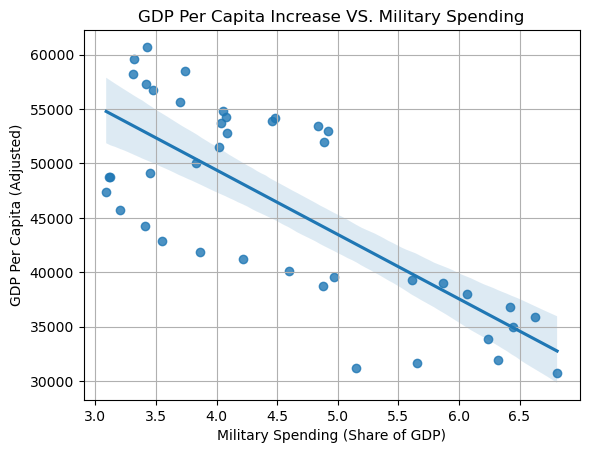

In [50]:
#Created a regression plot for visulization and analysis. 
sns.regplot(data=df_eda, x='Military Spending (Share of GDP)', y='GDP Per Capita (Adjusted)')
plt.title('GDP Per Capita Increase VS. Military Spending')
plt.grid(True)

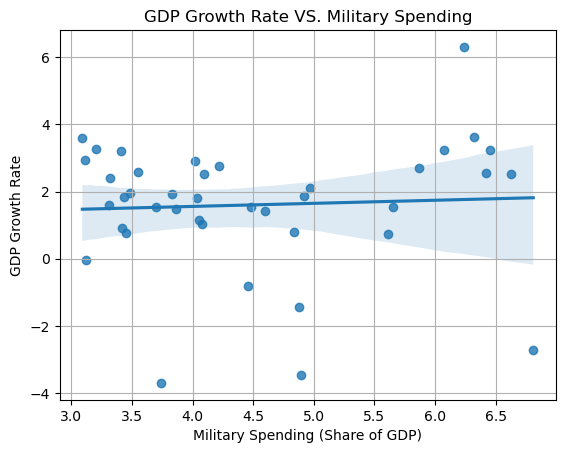

In [51]:
"""Initial analysis pointed towards GDP per capita giving an incorrect 
narrative due to postive annual increase that coumpounded. Decided to use Growth Rate to
isolate trends to years to negate the compounding effect"""
sns.regplot(data=df_eda, x='Military Spending (Share of GDP)', y='GDP Growth Rate')
plt.title('GDP Growth Rate VS. Military Spending')
plt.grid(True)

In [52]:
"""Initial analysis indicated the correlation matrix skewed towards
GDP and Military Spending having an inverse realtionship. However, 
using critical thinking and data visualization one can determine that 
there is no valid causation. First even when adjusted for inflation there 
is a compounding effect that doesn't align with a fixed rate percentage 
like military spending. Second, the amount per capita goes up in linear 
fashion and doesn't represent a fixed rate change from year to year. Thus,
a simple way to focus in on the data is to see that average 
GDP rate per year for years when military spending was highest and lowest"""

#Isolated data to years where military spending is greater than 5.5%
filtered_df = df_eda[df_eda['Military Spending (Share of GDP)'] > 5.5]
# Calculate the mean average of the GDP Growth Rate for Isolated data
average_gdp_growth_rate = filtered_df['GDP Growth Rate'].mean()
#average GDP growth rate greater than Military Spending (5.5% of GDP) is 2.37% 
average_gdp_growth_rate

#Isolated data to years where military speniding is less than 5.5%
filtered_df2 = df_eda[df_eda['Military Spending (Share of GDP)'] < 5.5]
# Calculate the mean average of the GDP Growth Rate for Isolated data
average_gdp_growth_rate2 = filtered_df2['GDP Growth Rate'].mean()
# average growth rate below 4.5% of GDP Military Spending is 1.35%
average_gdp_growth_rate2


1.347